**Insper**  
**Redes Sociais**

# Projeto: Best Books Ever

**Jorás Oliveira**  
**Luciano Dias**  
**Tiago Seixas**


In [15]:
import sys
import re
import random
import math
import itertools

import netpixi
import seaborn as sns
from graph_tool import centrality, spectral, clustering
from matplotlib import pyplot as plt
from netpixi.integration.gt import *
from regression.integration.gt import *
import numpy as np
import pandas as pd
import regression as reg

np.random.seed(27)

In [16]:
df = pd.read_csv("books_1.Best_Books_Ever.csv")
df

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,05/23/06,07-11-1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402,23328,NaN
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,10-10-2000,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",1983116,20452,NaN
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,09-06-2006,10-05-2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2.94001E+12,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,...,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],0,1,NaN
52474,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,1E+13,"['Mystery', 'Young Adult']",[],Paperback,...,August 5th 2011,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],0,1,NaN
52475,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9.78146E+12,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],Paperback,...,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],0,1,7.37
52476,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9.78145E+12,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],Paperback,...,September 1st 2011,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],0,1,2.86


## Vertices

In [17]:
#SIZE = 52_478
#SAMPLES_SIZE = 1_000
#samples = np.random.choice(SIZE, SAMPLES_SIZE, replace=False)
#
#samples.sort()
#
#g = Graph(directed=False) # não dirigido
#g.add_vp('rating')
#g.add_ep('weight')
#
#print(f"Processando {SAMPLES_SIZE} vertices...")
#
#next_id = 0
#vertex_index = 0
#header = []
#row = []
#genres = []
#with open('./books_1.Best_Books_Ever.csv', 'rt') as file:
#    for index, line in enumerate(file, -1):
#        columns = re.split(r"(?<=\S),(?=\S|$)", line)
#
#        if index == -1:
#            header = columns
#            continue
#
#        if len(row) == 0:
#            row = columns
#        elif len(row) < len(header):
#            row[-1] = "".join([row[-1], columns[0]])
#            row.extend(columns[1:])
#            
#        if len(row) < len(header):
#            continue
#        
#        if next_id not in samples:
#            next_id += 1
#            continue
#        
#        title = row[0]
#        rating = row[3]
#        col_genres = row[7]
#        book_genres = col_genres[2:-2].split("', '")
#        hash_genres = np.fromiter(map(hash, book_genres), np.int64)
#
#        genres.append(hash_genres)
#        
#        vertex = g.add_vertex(vertex_index)
#        vertex["rating"] = rating
#
#        row = []
#        next_id += 1
#        vertex_index += 1
#
#        if index % 100 == 0:
#            sys.stdout.write(f"\r{vertex_index} {(vertex_index*100)//SAMPLES_SIZE}%")
#            sys.stdout.flush()
#
#print(f"\r{(SAMPLES_SIZE*100)//len(genres)}% dos vertices criados!")

## Arestas

In [18]:
#size = math.comb(len(genres), 2)
#combinations = itertools.combinations(range(len(genres)), 2)
#
#print(f"Processando {size} arestas...")
#
#weights = []
#def get_weight(g1, g2):
#    inter = np.intersect1d(g1, g2)
#    
#    if len(inter) == 0:
#        return 0.0
#    
#    weight_1 = np.array([len(g1) - index for index, genre in enumerate(g1) if genre in inter])
#    weight_2 = np.array([len(g2) - index for index, genre in enumerate(g1) if genre in inter])
#    a = sum((weight_1 + weight_2) / (len(g1) + len(g2))) / len(inter)
#    
#    return np.power(a, 1 / len(inter))
#
#for index, (id_1, id_2) in enumerate(combinations):
#    if index % 1_000 == 0:
#        sys.stdout.write(f"\r{index} {(index*100)//size}%")
#        sys.stdout.flush()
#
#    weight = get_weight(genres[id_1], genres[id_2])
#
#    if weight > 0.5:
#        edge = g.add_edge(id_1, id_2)
#        edge["weight"] = weight
#    
#        weights.append(weight)
#    
#print(f"\r{(size*100)//len(weights)}% das arestas criadas!")

In [19]:
df_cols = df.loc[:, ("title", "rating", "genres")]

In [20]:
def para_lista(string):
    return string[2:-2].split("', '")

df_cols["genres"] = df_cols["genres"].apply(para_lista)

In [21]:
df_sorted = df_cols.sort_values(by='rating', ascending=False)

In [22]:
df_filtered = df_sorted[~df_sorted['genres'].apply(lambda x: len(x) == 1 and x[0] == '')]

In [23]:
df_sampled = df_filtered.sample(n=2000, random_state=27)

In [24]:
g = Graph(directed=False) # não dirigido
lc = clustering.local_clustering(g)
g.add_vp('rating')
g.add_ep('weight')
    
for index, row in df_cols.iterrows():
    vertex = g.add_vertex(index)
    vertex["rating"] = row["rating"]

In [25]:
pares_checados = set()

def dataset_edges(dataset):
    for index1, row1 in dataset.iterrows():
        for index2, row2 in dataset.iloc[index1+1:].iterrows():
            if (index1, index2) in pares_checados or (index2, index1) in pares_checados or index1 == index2:
                continue

            genres_1 = set(row1["genres"])
            genres_2 = set(row2["genres"])
            common_genres = genres_1.intersection(genres_2)
            peso1 = {}
            peso2 = {}
            peso = 0
            for genero in common_genres:
                peso1[genero] = len(genres_1) - list(genres_1).index(genero)
                peso2[genero] = len(genres_2) - list(genres_2).index(genero)
                peso += (peso1[genero] + peso2[genero])/(len(genres_1) + len(genres_2))

            if peso:
                edge = g.add_edge(index1, index2)
                rating1 = float(g.get_vertex(edge.get_source().get_id())["rating"])
                rating2 = float(g.get_vertex(edge.get_target().get_id())["rating"])
                if rating2 >= rating1:
                    edge["weight"] = peso * rating1/(len(common_genres) * rating2)
                else:
                    edge["weight"] = peso * rating2/(len(common_genres) * rating1)

            pares_checados.add((index1, index2))

In [26]:
dataset_edges(df_sampled)

In [27]:
g = gt_clean(g)

In [28]:
cc = centrality.closeness(g)

In [29]:
hcc = centrality.closeness(g, harmonic=True)

In [30]:
g.add_vp('closeness', cc)

In [31]:
n = g.num_vertices()
n

1923

In [32]:
m = g.num_edges()
m

68187

In [33]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2

d = m / max_edges
d

0.0368976673739166

In [34]:
#sns.histplot(weights)

In [35]:
# Salva o grafo
# Limpa e salva o grafo
g = gt_clean(g)

gt_save(g, 'best-books-ever.net.gz')

In [36]:
new_data = {'vertice_fonte': [],
        'rating_fonte': [],
        'vertice_alvo': [],
        'rating_alvo': [],
        'peso': []}

for e in g.all_edges():
        for key, value in e.items():
            new_data["peso"].append(value)
            if (g.get_vertex(e.get_source().get_id())["rating"] == '[]' and g.get_vertex(e.get_target().get_id())["rating"] != '[]'):
                new_data["vertice_alvo"].append(e.get_source().get_id())
                new_data["vertice_fonte"].append(e.get_target().get_id())
                new_data["rating_alvo"].append(0)
                new_data["rating_fonte"].append(float(g.get_vertex(e.get_target().get_id())["rating"]))
            elif (g.get_vertex(e.get_source().get_id())["rating"] != '[]' and g.get_vertex(e.get_target().get_id())["rating"] == '[]'):
                new_data["vertice_alvo"].append(e.get_target().get_id())
                new_data["vertice_fonte"].append(e.get_source().get_id())
                new_data["rating_fonte"].append(float(g.get_vertex(e.get_source().get_id())["rating"]))
                new_data["rating_alvo"].append(0)
            elif (g.get_vertex(e.get_source().get_id())["rating"] >= g.get_vertex(e.get_target().get_id())["rating"]):
                new_data["vertice_fonte"].append(e.get_source().get_id())
                new_data["vertice_alvo"].append(e.get_target().get_id())    
                new_data["rating_fonte"].append(float(g.get_vertex(e.get_source().get_id())["rating"]))
                new_data["rating_alvo"].append(float(g.get_vertex(e.get_target().get_id())["rating"]))
            elif (g.get_vertex(e.get_source().get_id())["rating"] < g.get_vertex(e.get_target().get_id())["rating"]):
                new_data["vertice_alvo"].append(e.get_source().get_id())
                new_data["vertice_fonte"].append(e.get_target().get_id())
                new_data["rating_alvo"].append(float(g.get_vertex(e.get_source().get_id())["rating"]))
                new_data["rating_fonte"].append(float(g.get_vertex(e.get_target().get_id())["rating"]))
            else:
                new_data["vertice_alvo"].append(e.get_source().get_id())
                new_data["vertice_fonte"].append(e.get_target().get_id())
                new_data["rating_alvo"].append(0)
                new_data["rating_fonte"].append(0)

In [37]:
peso_df = pd.DataFrame(new_data)
peso_df

,vertice_fonte,rating_fonte,vertice_alvo,rating_alvo,peso
0,0,4.30,1481,3.97,0.242962
1,0,4.30,479,3.09,0.179651
2,0,4.30,1863,4.10,0.476744
3,0,4.30,1471,3.79,0.484767
4,0,4.30,425,4.10,0.390930
...,...,...,...,...,...
68182,300,4.02,86,3.94,0.147015
68183,941,4.13,86,3.94,0.442926
68184,86,3.94,19,3.88,0.295431
68185,103,4.09,86,3.94,0.240831


In [38]:
result = reg.linear(data=peso_df, formula='rating_alvo ~ rating_fonte + peso + vertice_fonte + vertice_alvo')
result.micro_summary()

variable,coefficient,std error,p-value
rating_fonte,0.492288,0.004142,0.000000
peso,0.156427,0.004611,0.000000
vertice_fonte,0.000025,0.000002,0.000000
vertice_alvo,-0.000067,0.000001,0.000000


<AxesSubplot: xlabel='peso', ylabel='Count'>

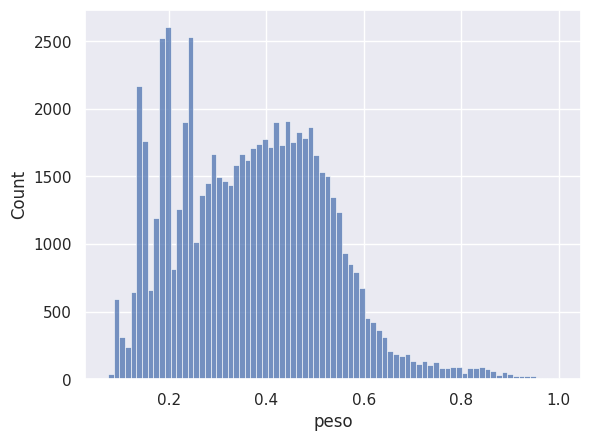

In [39]:
sns.histplot(peso_df['peso'])

count    1923.000000
mean       70.917317
std       187.594236
min         1.000000
25%        12.000000
50%        34.000000
75%        62.000000
max      1592.000000
Name: degree, dtype: float64

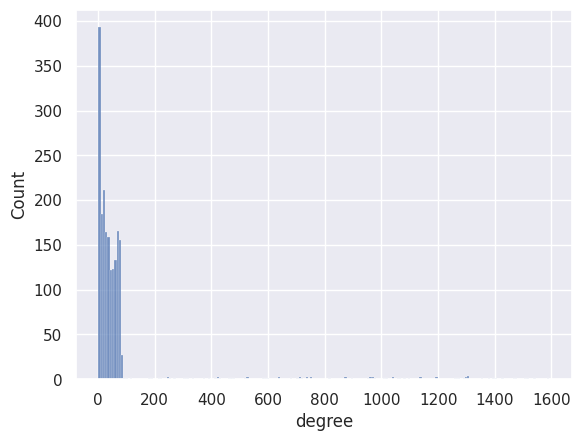

In [40]:
data = gt_data(g)
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

data['degree'] = degrees
sns.histplot(data['degree'])
data['degree'].describe()

In [41]:
m = gt_draw.sfdp_layout(g)

gt_move(g, m)
gt_save(g, 'best-books-ever.net.gz')

In [ ]:
r = netpixi.render('best-books-ever.net.gz', infinite=True);

In [46]:
r.edge_scale('weight', 1, 10)
r.vertex_scale('rating', 5, 20)